# Cross validation

Cross-validation, sometimes called rotation estimation, or out-of-sample testing is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set.

# Importing libraries

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as pp
%matplotlib inline

In [2]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Importing dataset
Loading gapminder data for year 1985

In [3]:
gapminder = pd.read_csv('gapminder.xls')

In [4]:
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


In [5]:
gapminder.shape

(14740, 9)

In [6]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
country             14740 non-null object
year                14740 non-null int64
region              14740 non-null object
population          14740 non-null float64
life_expectancy     14740 non-null float64
age5_surviving      14740 non-null float64
babies_per_woman    14740 non-null float64
gdp_per_capita      14740 non-null float64
gdp_per_day         14740 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [7]:
gdata = gapminder.query('year == 1985')

# Refactored plotting 

In [8]:
def sc(data):
    return 1e-6 * data.population, data.region.map({'Africa': 'skyblue', 'Europe': 'gold',
                                                   'America': 'palegreen', 'Asia': 'coral'})

def plotdata(data=gdata):
    size, colors = sc(data)
    data.plot.scatter('age5_surviving','babies_per_woman',
                      c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)
                      
def plotfit(fit,data=gdata):
    plotdata(data)

    size, colors = sc(data)
    pp.scatter(data.age5_surviving,fit.predict(data),
               c=colors,s=30,linewidths=0.5,edgecolor='k',marker='D')

## Model formulas

In [9]:
f_groupmeans = 'babies_per_woman ~ -1 + region'
f_surviving = 'babies_per_woman ~ -1 + region + age5_surviving'
f_srp = ('babies_per_woman ~ -1 + region + age5_surviving'
         '+ age5_surviving:region - age5_surviving + population')

In [10]:
shuffled = gdata.sample(len(gdata))

In [11]:
training, testing = shuffled.iloc[:len(gdata)//2], shuffled.iloc[len(gdata)//2:]

In [12]:
surviving = smf.ols(f_surviving, data=training).fit()

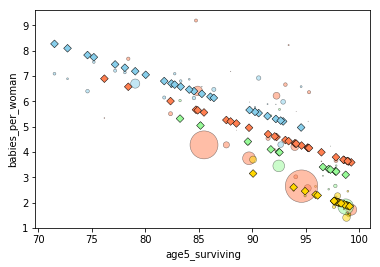

In [13]:
plotfit(surviving, training)

In [14]:
surviving.mse_resid

1.1788987252321024

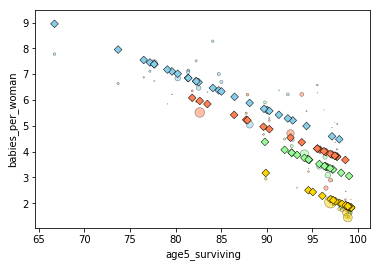

In [15]:
plotfit(surviving,testing)

In [16]:
resid = surviving.predict(testing) - testing.babies_per_woman

df = len(testing) - surviving.df_model - 1

np.sum(resid*2) / df

0.007217638636098855

In [17]:
def cross_validate(data, formula, response, n=100):
    ret = []
    
    for i in range(n):
        shuffled = data.sample(len(data))
        
        training, testing = shuffled.iloc[:len(data)//2], shuffled.iloc[len(data)//2:]
        
        trained = smf.ols(formula, data=training).fit()
        
        resid = trained.predict(testing) - testing[response]

        df = len(testing) - trained.df_model - 1

        mse = np.sum(resid**2) / df
        
        ret.append(mse)
        
    return np.mean(ret)

In [18]:
cross_validate(gdata,f_groupmeans, 'babies_per_woman')

1.628955910131137

In [19]:
cross_validate(gdata,f_surviving, 'babies_per_woman')

1.0410317626383332

In [20]:
cross_validate(gdata,f_srp, 'babies_per_woman')

1.210206768666863